# Data Visualization
Dieses Notebook erstellt Visualisierungen, welche für den Bericht verwendet werden.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from config import PREPROCESSED_BFS_DATA_FOREIGNERS, PREPROCESSED_STADA_SOCIAL_ASSISTANCE_RATE, PREPROCESSED_STADA_FISCAL_POWER, PREPROCESSED_WIKIPEDIA_COMMUNITY_STATS, VISUALS_DIR, VISUALS_COMMUNITY_AREAS, VISUALS_SOCIAL_ASSISTANCE_RATE, VISUALS_FOREIGNERS

os.makedirs(VISUALS_DIR, exist_ok=True)

In [2]:
bfs_foreigners = pd.read_csv(PREPROCESSED_BFS_DATA_FOREIGNERS)
stada_fiscal_power = pd.read_csv(PREPROCESSED_STADA_FISCAL_POWER)
stada_social_assistance = pd.read_csv(PREPROCESSED_STADA_SOCIAL_ASSISTANCE_RATE)
wikipedia_data = pd.read_csv(PREPROCESSED_WIKIPEDIA_COMMUNITY_STATS)

## Visualisierung Gemeindefläche

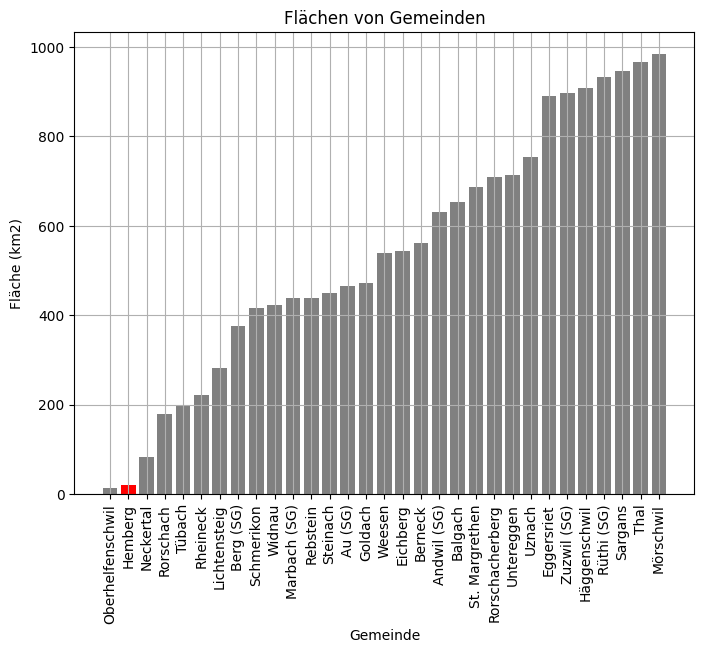

In [3]:
filtered_communities = wikipedia_data[wikipedia_data['area'] < 1000]
filtered_communities = filtered_communities.sort_values(by='area')

plt.figure(figsize=(8, 6))

for i, row in filtered_communities.iterrows():
    if row['community_name'] == 'Hemberg':
        plt.bar(row['community_name'], row['area'], color='red')
    else:
        plt.bar(row['community_name'], row['area'], color='grey')

plt.xlabel('Gemeinde')
plt.ylabel('Fläche (km2)')
plt.xticks(rotation=90)
plt.title('Flächen von Gemeinden')
plt.grid(True)

plt.savefig(VISUALS_COMMUNITY_AREAS, bbox_inches='tight')
plt.show()

## Visualisierung Sozialhilfequote

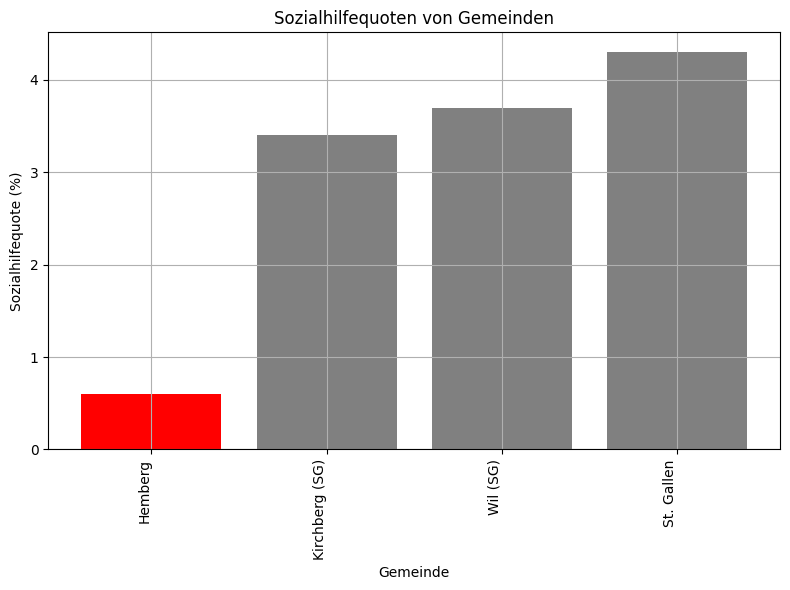

In [4]:
filtered_communities = stada_social_assistance.sort_values(by='value').query("community_name == 'Hemberg' or community_name == 'St. Gallen' or community_name == 'Kirchberg (SG)' or community_name == 'Wil (SG)'");

plt.figure(figsize=(8, 6))

for i, row in filtered_communities.iterrows():
    if row['community_name'] == 'Hemberg':
        plt.bar(row['community_name'], row['value'], color='red')
    else:
        plt.bar(row['community_name'], row['value'], color='grey')

plt.xlabel('Gemeinde')
plt.ylabel('Sozialhilfequote (%)')
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.title('Sozialhilfequoten von Gemeinden')
plt.grid(True)
plt.tight_layout()

plt.savefig(VISUALS_SOCIAL_ASSISTANCE_RATE, bbox_inches='tight')
plt.show()

## Visualisierung Anzahl Ausländer

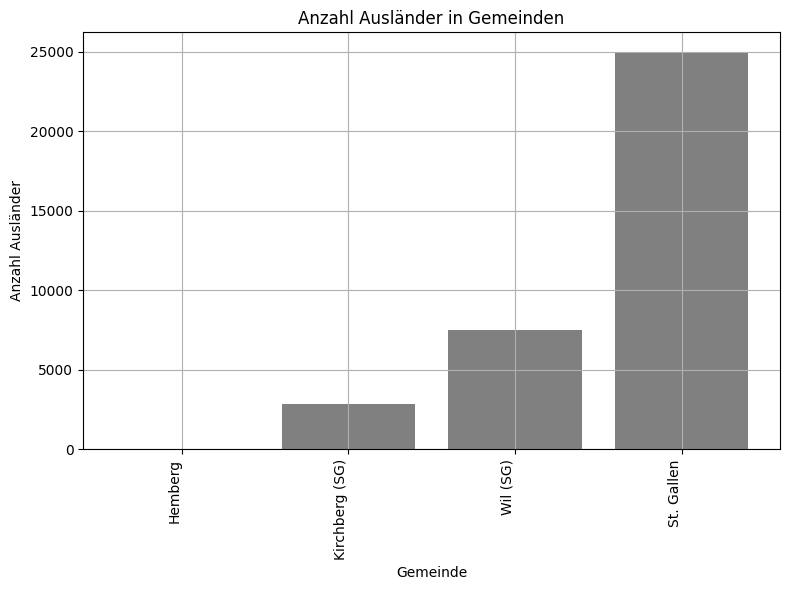

In [5]:
filtered_communities = bfs_foreigners.sort_values(by='number_of_foreigners').query("community_name == 'Hemberg' or community_name == 'St. Gallen' or community_name == 'Kirchberg (SG)' or community_name == 'Wil (SG)'");

plt.figure(figsize=(8, 6))

for i, row in filtered_communities.iterrows():
    if row['community_name'] == 'Hemberg':
        plt.bar(row['community_name'], row['number_of_foreigners'], color='red')
    else:
        plt.bar(row['community_name'], row['number_of_foreigners'], color='grey')

plt.xlabel('Gemeinde')
plt.ylabel('Anzahl Ausländer')
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.title('Anzahl Ausländer in Gemeinden')
plt.grid(True)
plt.tight_layout()

plt.savefig(VISUALS_FOREIGNERS, bbox_inches='tight')
plt.show()